<a href="https://colab.research.google.com/github/lrsilsbee/Analyses/blob/main/Lauren_Silsbee_Capstone_4_Breast_Cancer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

About 1 in 8 U.S. women (around 12%) will develop invasive breast cancer over the course of her lifetime. In 2020, an estimated 276,480 new cases of invasive breast cancer are expected to be diagnosed in women in the U.S., along with 48,530 new cases of non-invasive breast cancer (breastcancer.org). Breast cancer is a malignant cell growth in the breast. If left untreated, the cancer spreads to other areas of the body. The difference between the two types of tumors non-cancerous and cancerous is important. Benign tumor is non-cancerous and not dangerous on its own. But a malignant tumor, means the mass is cancerous. 

By exploring this dataset, we can learn about images taken from breast cancer screenings and how they return a diagnosis of malignant or benign. The purpose of this project is to determine whether we can build machine learning models to accurately predict which diagnosis is given to a patient based on the features of the image (items in the data set). This is important for both healthcare providers and patients during screenings, as the results can be used to react in a timely manner and begin a treatment process. 

I will start by exploring the data in detail. I will then fit five different supervised models (logistic regression, KNN, decision tree, random forest, and SVM) to determine whether the models can be used to accurately predict a diagnosis. I will also apply unsupervised learning techniques to the data, aiming to explore whether the data clusters in meaningful and interesting ways. Finally, I build an artifical neutral network to determine if deep learning techniques are useful for this datasest.

The *Breast Cancer Wisconsin (Diagnostic) Data Set* features were calculated from a digitized images of a fine needle aspirate (FNA) of a breast mass screening. The images describe characteristics of the cell nuclei present in the scan.

Attribute Information from the images:
1) ID number 
2) Diagnosis (M = malignant, B = benign) 
3)32 colummns of ten real-valued features are computed for each cell nucleus:
*   a) radius (mean of distances from center to points on the perimeter) 
*   b) texture (standard deviation of gray-scale values) 
*   c) perimeter
*   d) area
*   e) smoothness (local variation in radius lengths)
*   f) compactness (perimeter^2 / area - 1.0) 
*   g) concavity (severity of concave portions of the contour) 
*   h) concave points (number of concave portions of the contour) 
*   i) symmetry
*   j) fractal dimension (coastline approximation - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were calculated for each image, resulting in 30 features. For example, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius. 

This data set is available through the UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29 (where I accessed the file on January 6, 2020).

In [ ]:
pip install tensorflow-gpu==2.2.0-rc1

     |████████████████████████████████| 516.1MB 27kB/s 
     |████████████████████████████████| 3.9MB 62.7MB/s 
     |████████████████████████████████| 460kB 34.1MB/s 
ERROR: tensorflow 2.4.0 has requirement tensorboard~=2.4, but you'll have tensorboard 2.1.1 which is incompatible.
ERROR: tensorflow 2.4.0 has requirement tensorflow-estimator<2.5.0,>=2.4.0rc0, but you'll have tensorflow-estimator 2.2.0 which is incompatible.
  Found existing installation: tensorboard 2.4.0
    Uninstalling tensorboard-2.4.0:
      Successfully uninstalled tensorboard-2.4.0
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0


In [ ]:
import warnings
warnings.filterwarnings("ignore")
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import ensemble
from sklearn import svm, datasets
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score, classification_report, roc_curve, auc, roc_auc_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC 
from sklearn import ensemble
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from sklearn import svm, datasets
from sklearn.mixture import GaussianMixture
from scipy.stats.mstats import winsorize
from sklearn.utils import resample
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
import io
%matplotlib inline

In [ ]:
#load the data
from google.colab import files
files.upload()

Saving breast_cancer_diagnostics.csv to breast_cancer_diagnostics.csv


{'breast_cancer_diagnostics.csv': b'"id","diagnosis","radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean","radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave points_se","symmetry_se","fractal_dimension_se","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst",\r\n842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189\r\n842517,M,20.57,17.77,132.9,1326,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.0186,0.0134,0.01389,0.003532,24.99,23.41,158.8,1956,0.1238,0.1866,0.2416,0.186,0.275,0.

In [ ]:
#assign to dataframe
wisconsin_df = pd.read_csv(
    r'breast_cancer_diagnostics.csv')

##Data Exploration

In [ ]:
wisconsin_df.shape

(569, 33)

In [ ]:
print("Number of rows in the dataset : ",len(wisconsin_df))

Number of rows in the dataset :  569


In [ ]:
wisconsin_df.describe().T

count          mean  ...           75%           max
id                       569.0  3.037183e+07  ...  8.813129e+06  9.113205e+08
radius_mean              569.0  1.412729e+01  ...  1.578000e+01  2.811000e+01
texture_mean             569.0  1.928965e+01  ...  2.180000e+01  3.928000e+01
perimeter_mean           569.0  9.196903e+01  ...  1.041000e+02  1.885000e+02
area_mean                569.0  6.548891e+02  ...  7.827000e+02  2.501000e+03
smoothness_mean          569.0  9.636028e-02  ...  1.053000e-01  1.634000e-01
compactness_mean         569.0  1.043410e-01  ...  1.304000e-01  3.454000e-01
concavity_mean           569.0  8.879932e-02  ...  1.307000e-01  4.268000e-01
concave points_mean      569.0  4.891915e-02  ...  7.400000e-02  2.012000e-01
symmetry_mean            569.0  1.811619e-01  ...  1.957000e-01  3.040000e-01
fractal_dimension_mean   569.0  6.279761e-02  ...  6.612000e-02  9.744000e-02
radius_se                569.0  4.051721e-01  ...  4.789000e-01  2.873000e+00
texture_se               569.0  1.216853e+00  ...  1.474000e+00  4.885000e+00
perimeter_se             569.0  2.866059e+00  ...  3.357000e+00  2.198000e+01
area_se                  569.0  4.033708e+01  ...  4.519000e+01  5.422000e+02
smoothness_se            569.0  7.040979e-03  ...  8.146000e-03  3.113000e-02
compactness_se           569.0  2.547814e-02  ...  3.245000e-02  1.354000e-01
concavity_se             569.0  3.189372e-02  ...  4.205000e-02  3.960000e-01
concave points_se        569.0  1.179614e-02  ...  1.471000e-02  5.279000e-02
symmetry_se              569.0  2.054230e-02  ...  2.348000e-02  7.895000e-02
fractal_dimension_se     569.0  3.794904e-03  ...  4.558000e-03  2.984000e-02
radius_worst             569.0  1.626919e+01  ...  1.879000e+01  3.604000e+01
texture_worst            569.0  2.567722e+01  ...  2.972000e+01  4.954000e+01
perimeter_worst          569.0  1.072612e+02  ...  1.254000e+02  2.512000e+02
area_worst               569.0  8.805831e+02  ...  1.084000e+03  4.254000e+03
smoothness_worst         569.0  1.323686e-01  ...  1.460000e-01  2.226000e-01
compactness_worst        569.0  2.542650e-01  ...  3.391000e-01  1.058000e+00
concavity_worst          569.0  2.721885e-01  ...  3.829000e-01  1.252000e+00
concave points_worst     569.0  1.146062e-01  ...  1.614000e-01  2.910000e-01
symmetry_worst           569.0  2.900756e-01  ...  3.179000e-01  6.638000e-01
fractal_dimension_worst  569.0  8.394582e-02  ...  9.208000e-02  2.075000e-01
Unnamed: 32                0.0           NaN  ...           NaN           NaN

[32 rows x 8 columns]

In [ ]:
wisconsin_df.head(10)

id diagnosis  ...  fractal_dimension_worst  Unnamed: 32
0    842302         M  ...                  0.11890          NaN
1    842517         M  ...                  0.08902          NaN
2  84300903         M  ...                  0.08758          NaN
3  84348301         M  ...                  0.17300          NaN
4  84358402         M  ...                  0.07678          NaN
5    843786         M  ...                  0.12440          NaN
6    844359         M  ...                  0.08368          NaN
7  84458202         M  ...                  0.11510          NaN
8    844981         M  ...                  0.10720          NaN
9  84501001         M  ...                  0.20750          NaN

[10 rows x 33 columns]

In this data set we can see that there are ten real-valued features that are computed for each cell nucleus:

*   a) radius (mean of distances from center to points on the perimeter)
*   b) texture (standard deviation of gray-scale values)
*   c) perimeter
*   d) area
*   e) smoothness (local variation in radius lengths)
*   f) compactness (perimeter^2 / area - 1.0)
*   g) concavity (severity of concave portions of the contour)
*   h) concave points (number of concave portions of the contour)
*   i) symmetry
*   j) fractal dimension ("coastline approximation" - 1)

Check on the types of data in the data set. 

In [ ]:
wisconsin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

All are numerical with the exception of the "Diagnosis" column. 

Let's look at count by diagnosis.

In [ ]:
wisconsin_df['diagnosis'].value_counts(normalize=True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

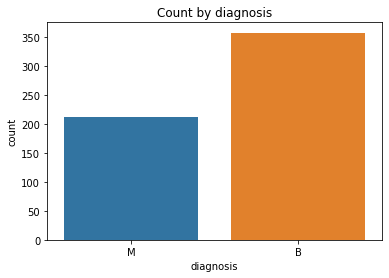

In [ ]:
sns.countplot(data=wisconsin_df, x='diagnosis')
plt.title('Count by diagnosis')
plt.show()

Let's also look at the pie chart to see percentage of diagnoses.

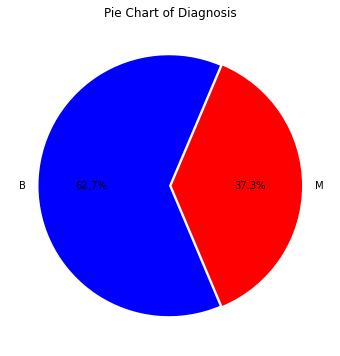

In [ ]:
plt.figure(figsize=(10,6))
plt.pie(wisconsin_df.diagnosis.value_counts().values,colors=("blue","red"),labels=wisconsin_df.diagnosis.value_counts().index
       ,explode=(0.01,0.01),autopct="%1.1f%%",startangle=67)
plt.title("Pie Chart of Diagnosis")
plt.show()

We can see that of the patients sampled, most resulted in a benign disnosis (357) while the rest were diagnosed as malignant (212). We can also see that 62.7% of diagnosis are benign and 37.3% are malignant.

Let's check the data for missing values. 

In [ ]:
#get missing values
wisconsin_df.isnull().sum()/wisconsin_df.isnull().count().sort_values(ascending=True)

Unnamed: 32                1.0
area_mean                  0.0
area_se                    0.0
area_worst                 0.0
compactness_mean           0.0
compactness_se             0.0
compactness_worst          0.0
concave points_mean        0.0
concave points_se          0.0
concave points_worst       0.0
concavity_mean             0.0
concavity_se               0.0
concavity_worst            0.0
diagnosis                  0.0
fractal_dimension_mean     0.0
fractal_dimension_se       0.0
fractal_dimension_worst    0.0
id                         0.0
perimeter_mean             0.0
perimeter_se               0.0
perimeter_worst            0.0
radius_mean                0.0
radius_se                  0.0
radius_worst               0.0
smoothness_mean            0.0
smoothness_se              0.0
smoothness_worst           0.0
symmetry_mean              0.0
symmetry_se                0.0
symmetry_worst             0.0
texture_mean               0.0
texture_se                 0.0
texture_

This is a very clean data set with no missing values. The columns **id** (patient id numbers) and **unnamed 32** appear to be unhelpful in terms in data insights, so I will drop them. After dropping those columns, it will be safe to move forward with the exploration. 

In [ ]:
# drop id and unamed 32
wisconsin_df.drop(['id'], axis=1, inplace=True)
wisconsin_df.drop(['Unnamed: 32'], axis=1, inplace=True)

Create list of the numeric columns

In [ ]:
numeric_columns = wisconsin_df.select_dtypes(['int64', 'float64']).columns
print(numeric_columns)

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


Get ouliers for numeric columns

In [ ]:
for col in numeric_columns:
    q75, q25 = np.percentile(wisconsin_df[col], [75 ,25])
    iqr = q75 - q25


    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)

    print("The number of outliers for {} is: {}. This is {} percent of the column.".format(col, len((np.where((wisconsin_df[col] > max_val) 
                      | (wisconsin_df[col] < min_val))[0])), len((np.where((wisconsin_df[col] > max_val) | 
                                                    (wisconsin_df[col] < min_val))[0]))*100/1987))

The number of outliers for radius_mean is: 14. This is 0.704579768495219 percent of the column.
The number of outliers for texture_mean is: 7. This is 0.3522898842476095 percent of the column.
The number of outliers for perimeter_mean is: 13. This is 0.6542526421741318 percent of the column.
The number of outliers for area_mean is: 25. This is 1.2581781580271767 percent of the column.
The number of outliers for smoothness_mean is: 6. This is 0.3019627579265224 percent of the column.
The number of outliers for compactness_mean is: 16. This is 0.8052340211373931 percent of the column.
The number of outliers for concavity_mean is: 18. This is 0.9058882737795672 percent of the column.
The number of outliers for concave points_mean is: 10. This is 0.5032712632108707 percent of the column.
The number of outliers for symmetry_mean is: 15. This is 0.754906894816306 percent of the column.
The number of outliers for fractal_dimension_mean is: 15. This is 0.754906894816306 percent of the column.


There are several outliers in the data. This makes me think that those data points are relevant to the outcome and should not be addressed. In researching the origin of this data set, the authors mention that "the features are numerically modeled such that larger values will typically indicate a higher likelihood of malignancy". As I mentioned above, those values are relevant to the data and should not be addressed or removed. 

#Visualize the data

Let's check for correlations: 

In [ ]:
wisconsin_df.corr()

radius_mean  ...  fractal_dimension_worst
radius_mean                 1.000000  ...                 0.007066
texture_mean                0.323782  ...                 0.119205
perimeter_mean              0.997855  ...                 0.051019
area_mean                   0.987357  ...                 0.003738
smoothness_mean             0.170581  ...                 0.499316
compactness_mean            0.506124  ...                 0.687382
concavity_mean              0.676764  ...                 0.514930
concave points_mean         0.822529  ...                 0.368661
symmetry_mean               0.147741  ...                 0.438413
fractal_dimension_mean     -0.311631  ...                 0.767297
radius_se                   0.679090  ...                 0.049559
texture_se                 -0.097317  ...                -0.045655
perimeter_se                0.674172  ...                 0.085433
area_se                     0.735864  ...                 0.017539
smoothness_se              -0.222600  ...                 0.101480
compactness_se              0.206000  ...                 0.590973
concavity_se                0.194204  ...                 0.439329
concave points_se           0.376169  ...                 0.310655
symmetry_se                -0.104321  ...                 0.078079
fractal_dimension_se       -0.042641  ...                 0.591328
radius_worst                0.969539  ...                 0.093492
texture_worst               0.297008  ...                 0.219122
perimeter_worst             0.965137  ...                 0.138957
area_worst                  0.941082  ...                 0.079647
smoothness_worst            0.119616  ...                 0.617624
compactness_worst           0.413463  ...                 0.810455
concavity_worst             0.526911  ...                 0.686511
concave points_worst        0.744214  ...                 0.511114
symmetry_worst              0.163953  ...                 0.537848
fractal_dimension_worst     0.007066  ...                 1.000000

[30 rows x 30 columns]

Draw a heatmap between mean features and diagnosis (target feature).

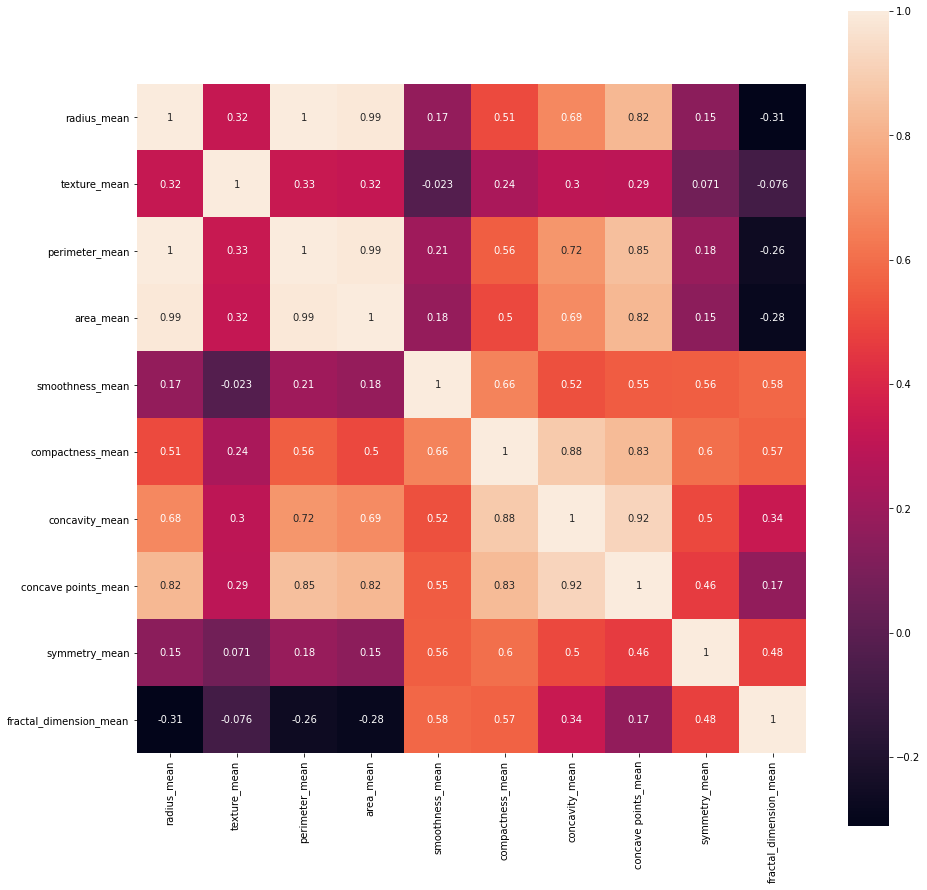

In [ ]:
features_mean = ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean', 'compactness_mean', 'concavity_mean','concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
plt.figure(figsize=(15,15))
heat = sns.heatmap(wisconsin_df[features_mean].corr(), vmax=1, square=True, annot=True)

In looking at the mean features we can see several strong correlations. To name a few, we can see that there are correlations betweenconcavity and concave points (0.92), compactness and concavity (0.88), area and radius (0.99), and perimeter and radius (1). The correlations provide insights for what features should be focused on during screenings. Let's explore these features more below. 

#Breaking Down Features for Visualization

Before further visualization, we need to normalize our standardization processes because differences between the values of features are too high to observe on plots. Features will be plotted in 3 groups (1st ten features, 2nd ten features, and remaining features) and each observation allows for more in depth exploration.

In [ ]:
# y includes our labels and x includes our features
y=wisconsin_df.diagnosis # M or B
list=['diagnosis']
x=wisconsin_df.drop(list,axis=1)
x.head()

radius_mean  texture_mean  ...  symmetry_worst  fractal_dimension_worst
0        17.99         10.38  ...          0.4601                  0.11890
1        20.57         17.77  ...          0.2750                  0.08902
2        19.69         21.25  ...          0.3613                  0.08758
3        11.42         20.38  ...          0.6638                  0.17300
4        20.29         14.34  ...          0.2364                  0.07678

[5 rows x 30 columns]

In [ ]:
data_dia=y # data diagnosis
data=x     # dropped data  
data_n_2=(data-data.mean())/(data.std())
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",var_name="features",value_name='value') # melt can run without var_name and value_name
print(data)

     diagnosis                features     value
0            M             radius_mean  1.096100
1            M             radius_mean  1.828212
2            M             radius_mean  1.578499
3            M             radius_mean -0.768233
4            M             radius_mean  1.748758
...        ...                     ...       ...
5685         M  fractal_dimension_mean -0.930209
5686         M  fractal_dimension_mean -1.057681
5687         M  fractal_dimension_mean -0.894800
5688         M  fractal_dimension_mean  1.042778
5689         B  fractal_dimension_mean -0.560539

[5690 rows x 3 columns]


*First Ten Features*

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

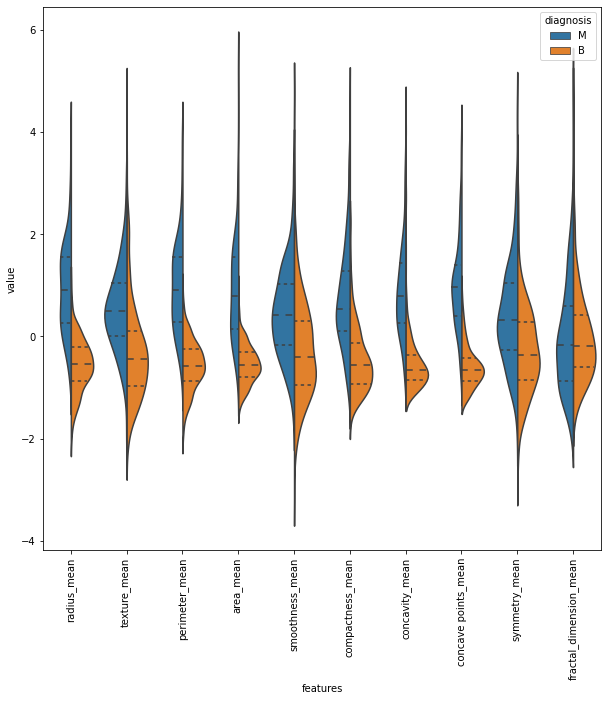

In [ ]:
# first ten features
data_dia=y # data diagnosis
data=x     # dropped data  
data_n_2=(data-data.mean())/(data.std())

# standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",var_name="features",value_name='value')

# violin plot
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

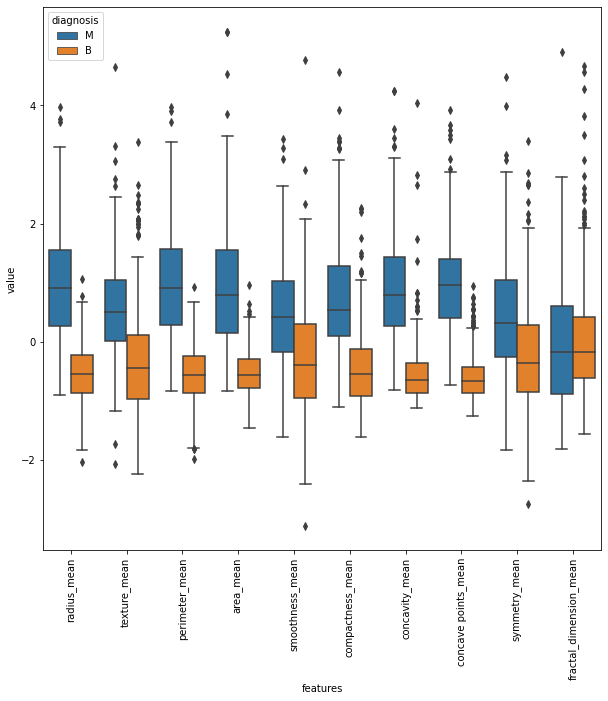

In [ ]:
# box plot
plt.figure(figsize=(10,10))
sns.boxplot(x='features',y='value',hue='diagnosis',data=data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

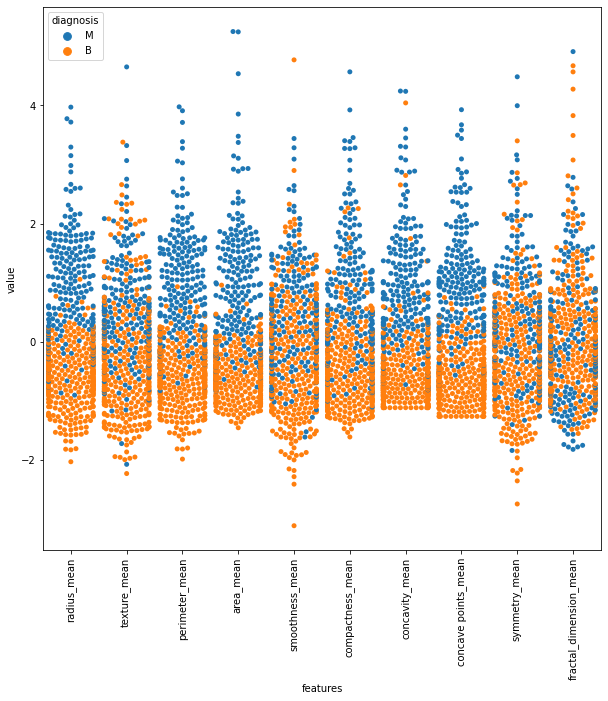

In [ ]:
# swarm plot
plt.figure(figsize=(10,10))
sns.swarmplot(x='features',y='value',hue='diagnosis',data=data)
plt.xticks(rotation=90)

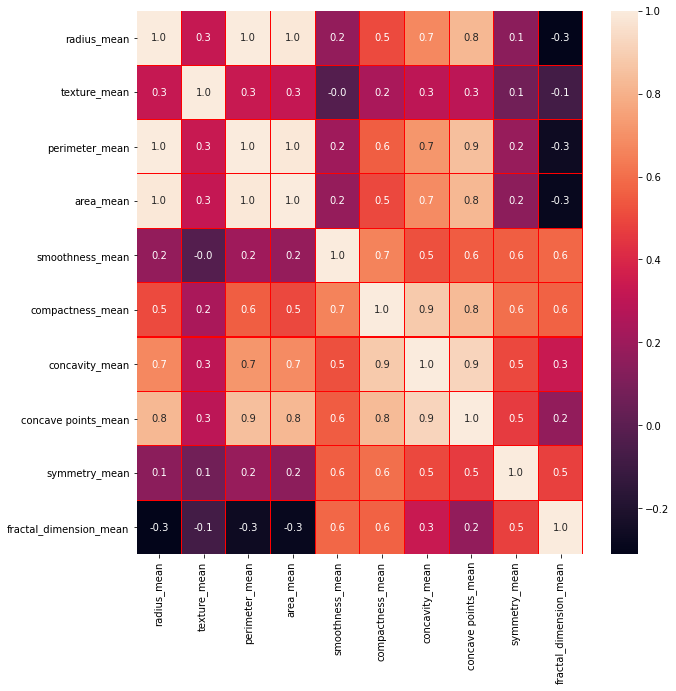

In [ ]:
# correlation map
f,ax = plt.subplots(figsize=(10, 10))
a=x.iloc[:,:10]
sns.heatmap(a.corr(), annot=True, linewidths=0.1,linecolor="red", fmt= '.1f',ax=ax)
plt.show()

When we analyze these visualizations, we see that in the radius_mean feature, median of the Malignant and Benign looks like they're separated, so this can be good for classification. However, in the fractal_dimension_mean feature, median of Malignant and Benign does not look like they are separated, making this information not ideal for classification.

*Second Ten Features*

Let's look at the second 10 features.

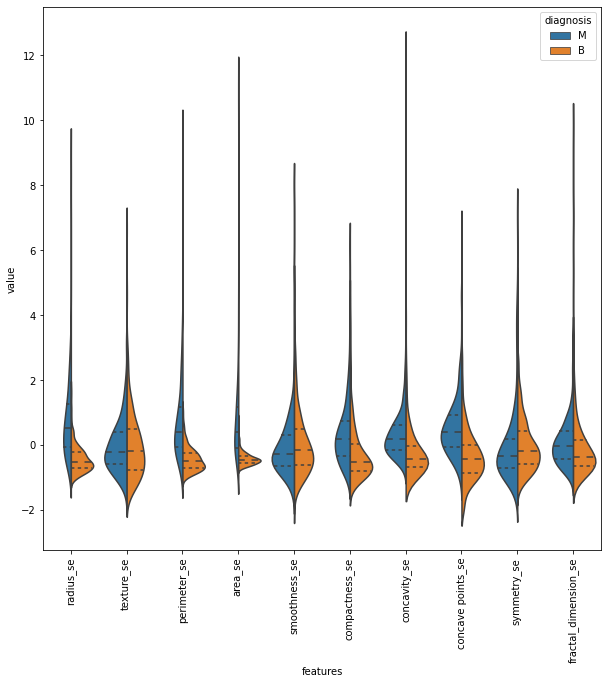

In [ ]:
# Second ten features
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data, id_vars="diagnosis", var_name="features", value_name="value")

plt.figure(figsize=(10,10))
sns.violinplot(x="features",y='value',hue='diagnosis',data=data,split=True,inner="quart")
plt.xticks(rotation=90)
plt.show()

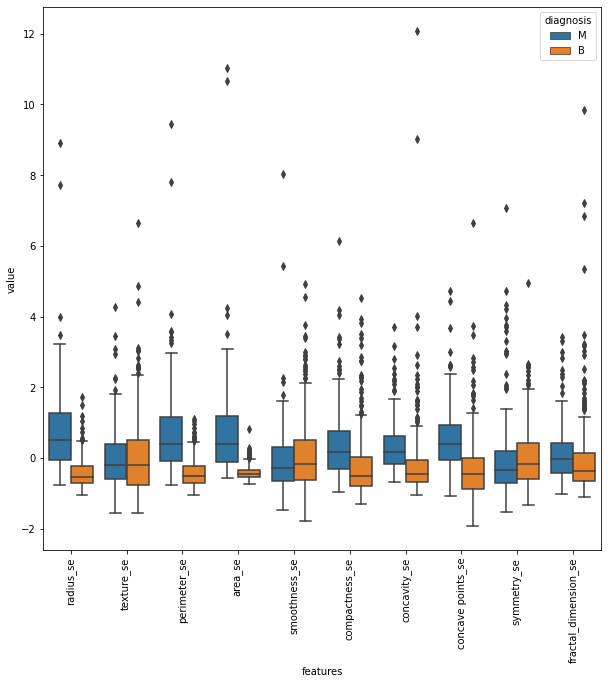

In [ ]:
# boxplot
f,ax = plt.subplots(figsize=(10, 10))
sns.boxplot(x='features',y='value',hue='diagnosis',data=data)
plt.xticks(rotation=90)
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

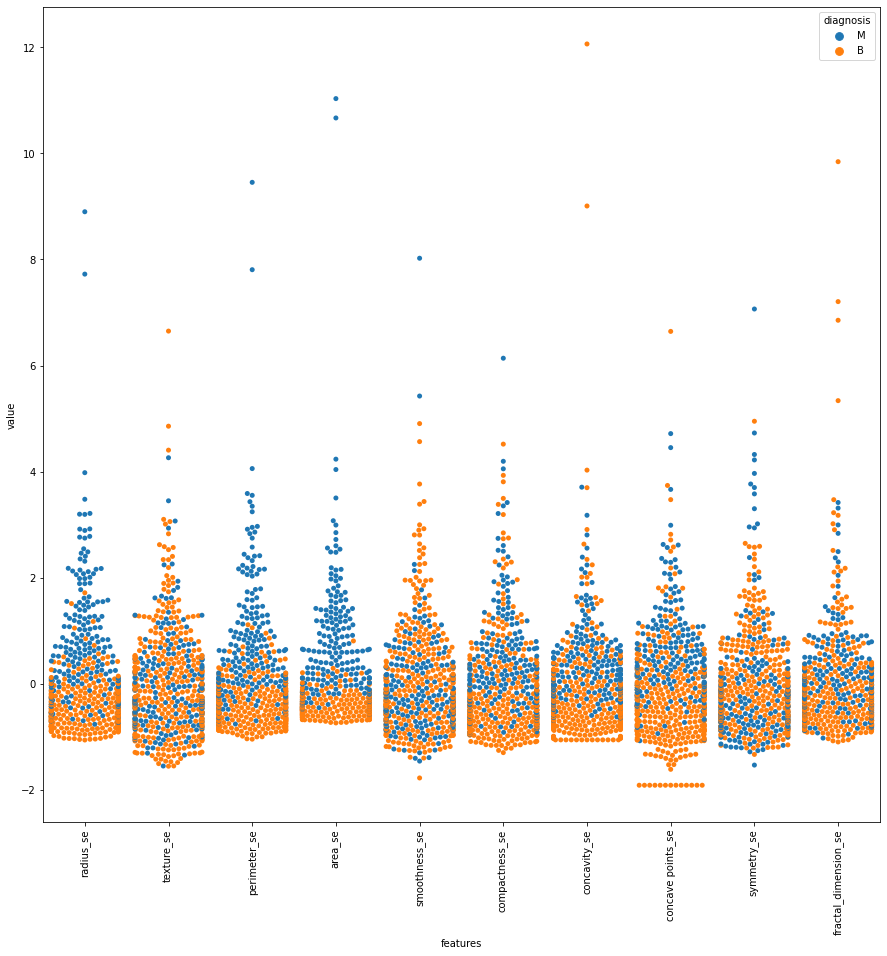

In [ ]:
# swarm plot
plt.figure(figsize=(15,15))
sns.swarmplot(x='features',y='value',hue='diagnosis',data=data)
plt.xticks(rotation=90)

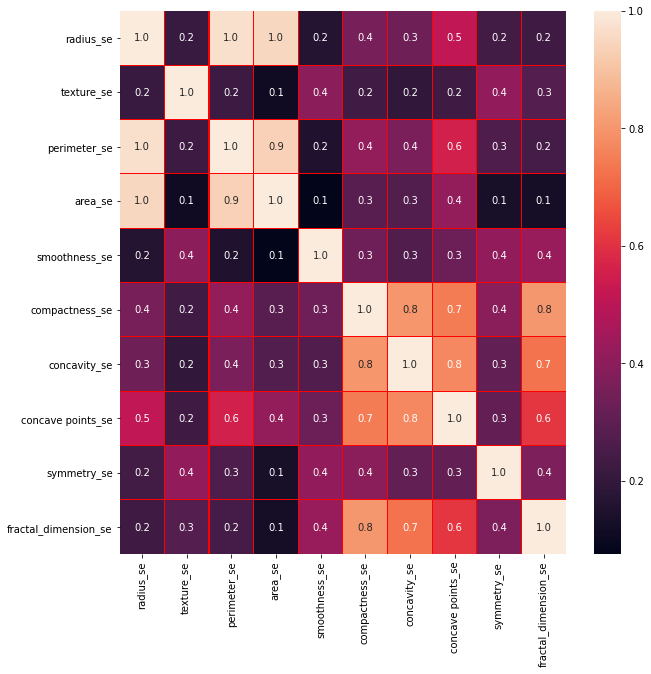

In [ ]:
# correlation map
f,ax = plt.subplots(figsize=(10, 10))
a=x.iloc[:,10:20]
sns.heatmap(a.corr(), annot=True, linewidths=0.1,linecolor="red", fmt= '.1f',ax=ax)
plt.show()

When we analyze these visualizations like with the first ten features, in the perimeter_se feature, median of the Malignant and Benign looks like it's separated, making it a good option for classification. However, in the texture_se feature, median of Malignant and Benign does not look like it's separated and does not provide insight for classification.

*Remaining Features*

Take a look at the remianing features.

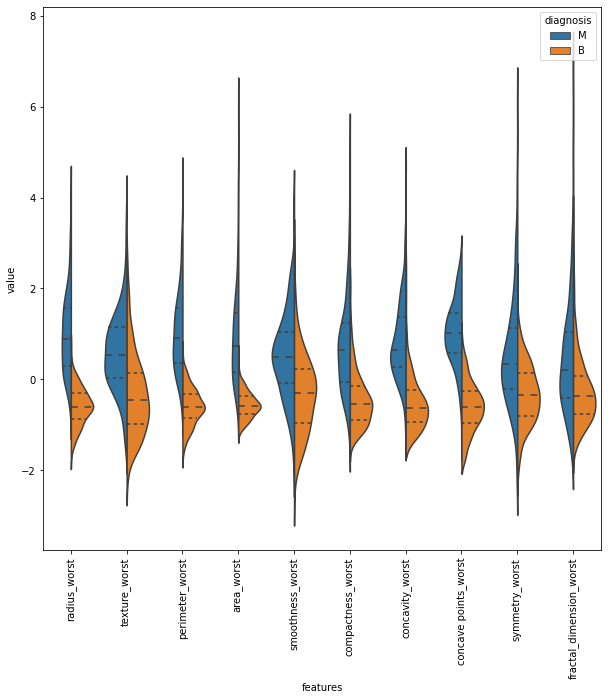

In [ ]:
# Remaining features
data = pd.concat([y,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data, id_vars="diagnosis", var_name="features", value_name="value")

plt.figure(figsize=(10,10))
sns.violinplot(x="features",y='value',hue='diagnosis',data=data,split=True,inner="quart")
plt.xticks(rotation=90)
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

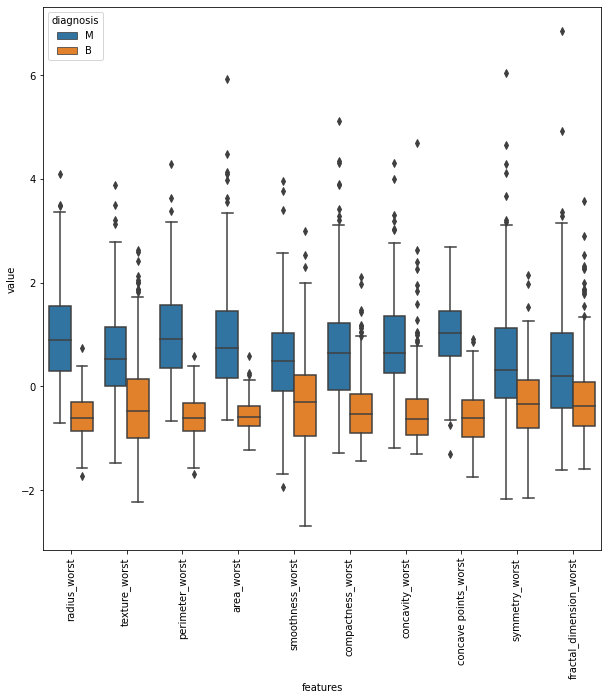

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x='features',y='value',hue='diagnosis',data=data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

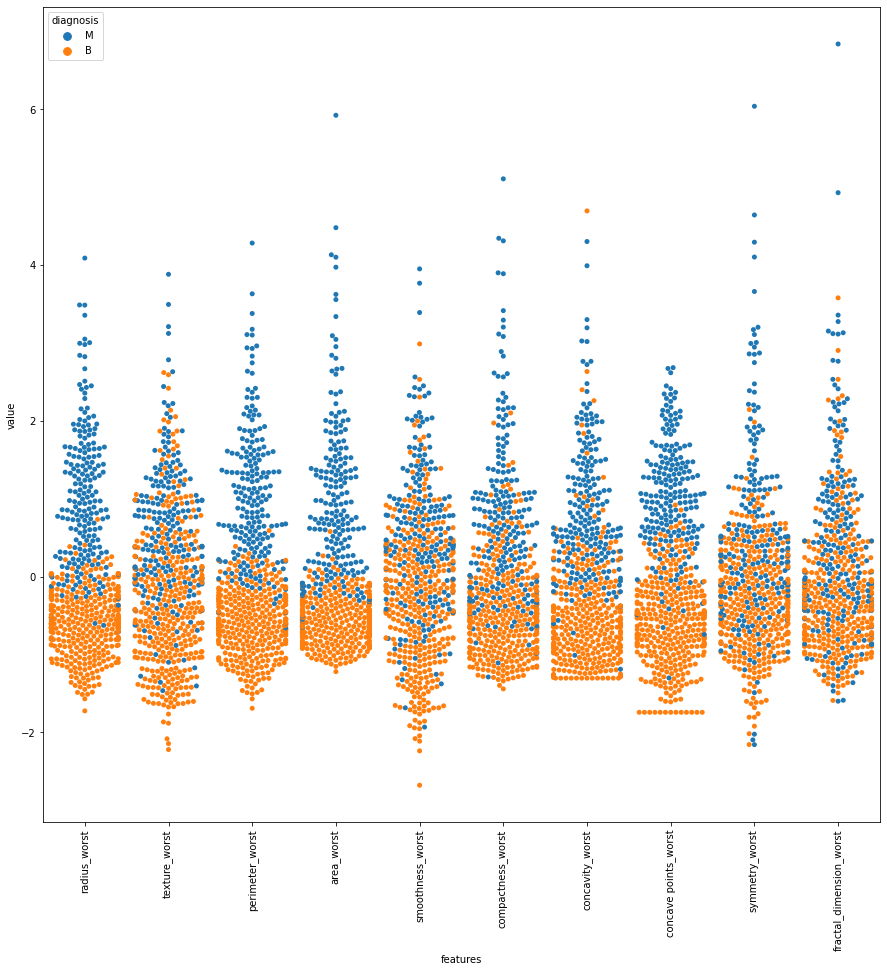

In [ ]:
# swarm plot
plt.figure(figsize=(15,15))
sns.swarmplot(x='features',y='value',hue='diagnosis',data=data)
plt.xticks(rotation=90)

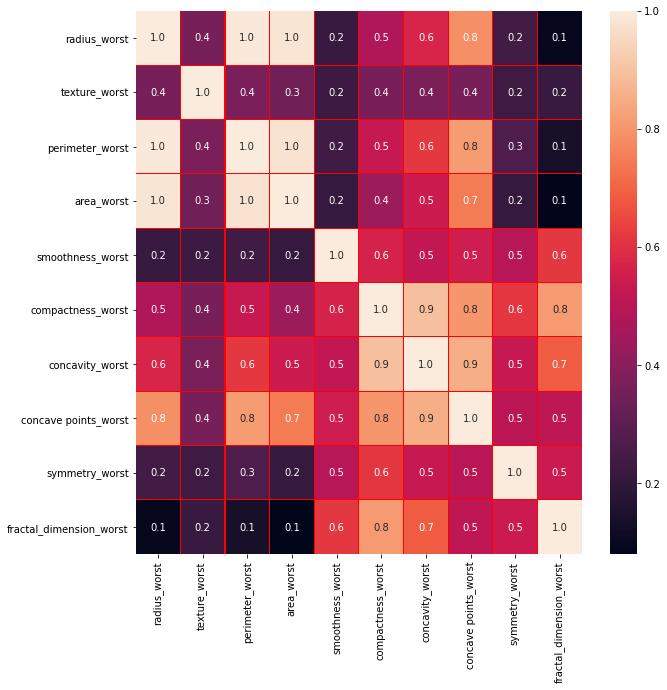

In [ ]:
# correlation map
f,ax = plt.subplots(figsize=(10, 10))
a=x.iloc[:,20:31]
sns.heatmap(a.corr(), annot=True, linewidths=0.1,linecolor="red", fmt= '.1f',ax=ax)
plt.show()

In our at the remaining features in the data set, in the radius_worst and concavity_worst feature, median of the Malignant and Benign looks like they're separated, making this good information for classification.

Let's run another heat matrix with all features in the data set:

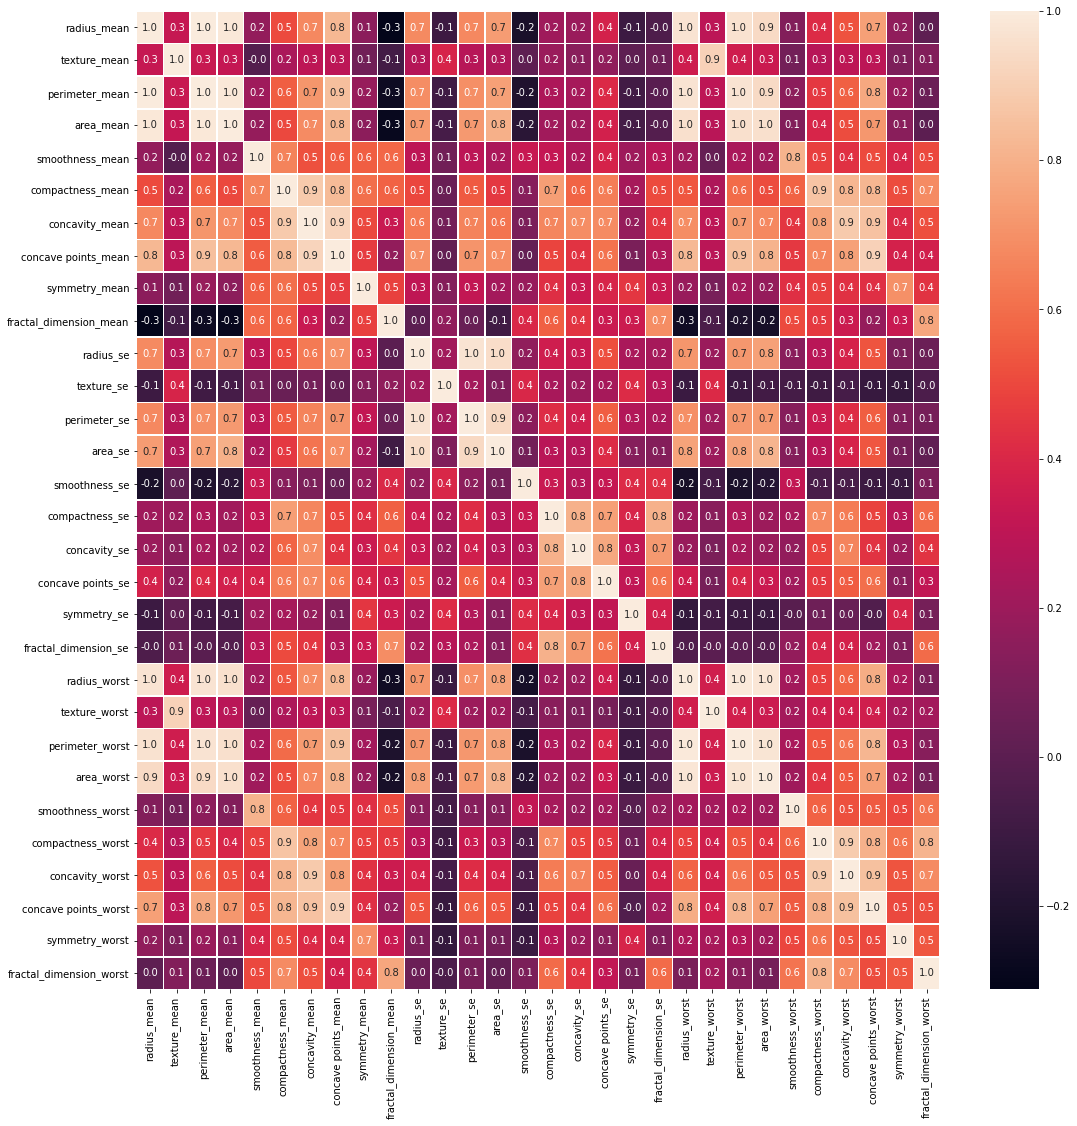

In [ ]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

There are strong positive linear relationships between malignancy and radius of nuclear, number of concave points, perimeter and area. That is not surprising, as these features were modeled in such way that higher values are typically associated with malignancy. To examine multicollinearity I will look at pairwise scatter plots of pairs of first 10 and last 10 variables (for the sake of simplicity and visualization), looking for near perfect relationships.

In [ ]:
means = [col for col in wisconsin_df.columns if col.endswith('_mean')]
se = [col for col in wisconsin_df.columns if col.endswith('_se')]
worst = [col for col in wisconsin_df.columns if col.endswith('_worst')]

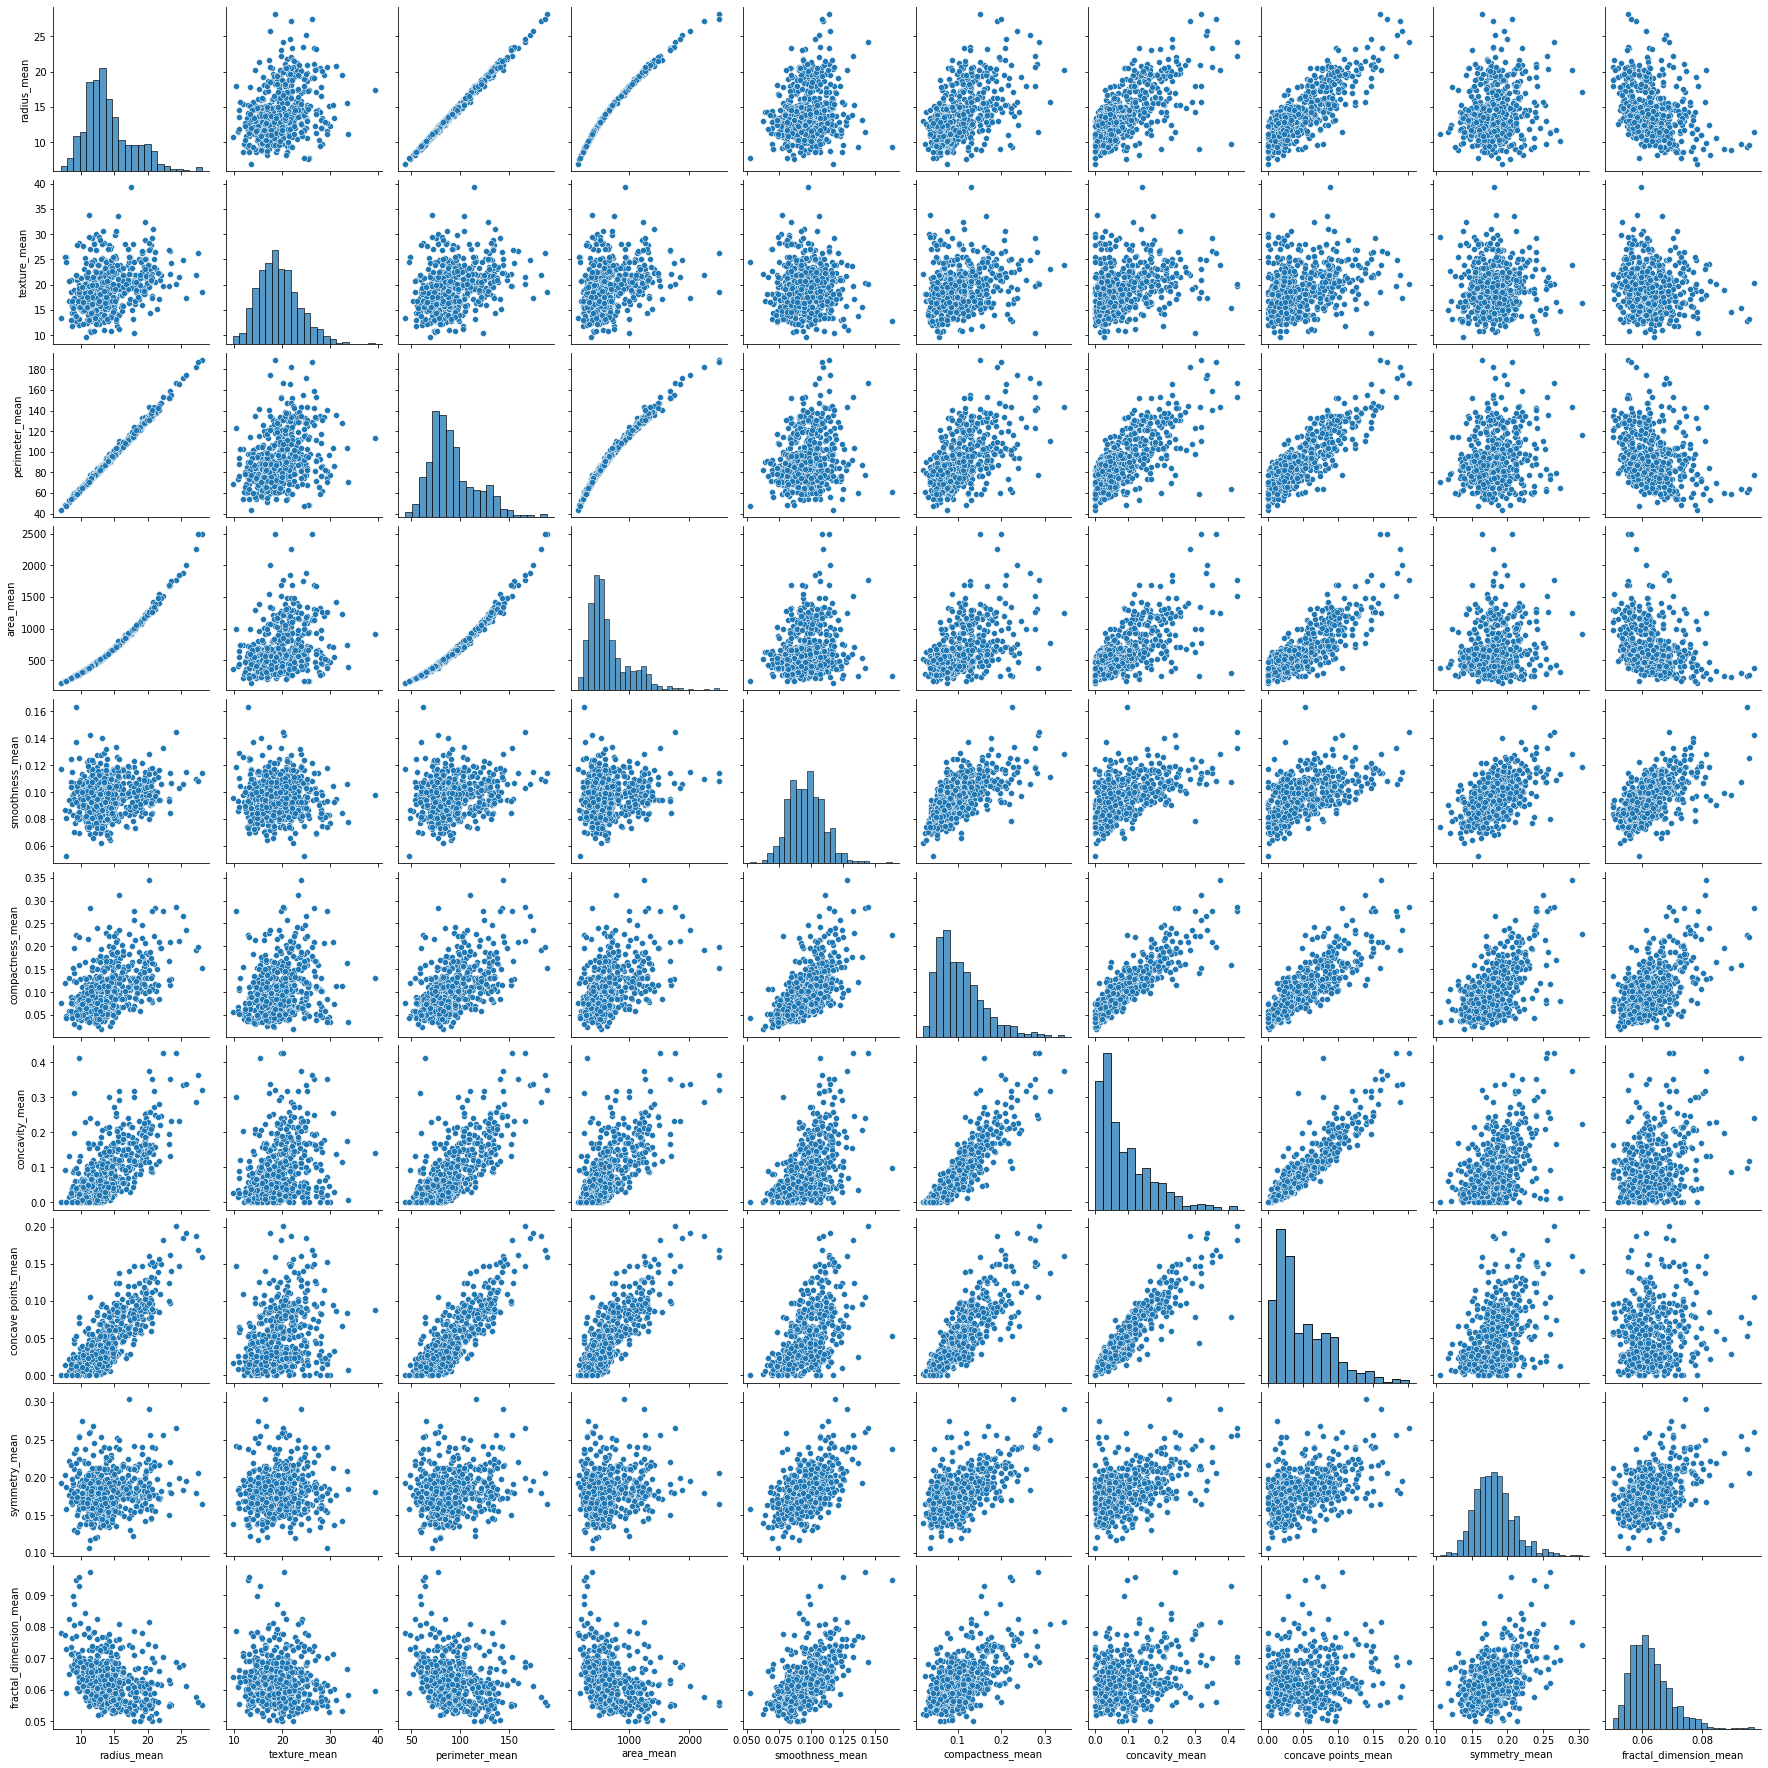

In [ ]:
%config InlineBackend.figure_format = 'png'
sns.pairplot(wisconsin_df[means]);

As you can see, their ranges are quite different and not representable on a small graph. Every plot includes markers indicating the median and the interquartile (middle 50%) range. In first nine features the median of malignant tumor is easily contrasted with the benign. Generally speaking, for the benign mass the median is lower for all features, which makes sense, because features were modeled such that higher values are typically associated with malignancy. For example, area_mean is higher for cancerous mass on average.

Let's look at the standard deviation of features:

In [ ]:
wisconsin_df.groupby(['diagnosis'])['area_mean'].mean()

diagnosis
B    462.790196
M    978.376415
Name: area_mean, dtype: float64

Make a cross table break down by diagnosis:

In [ ]:
numerical = wisconsin_df.drop('diagnosis',axis=1).columns
wisconsin_df.groupby(['diagnosis'])[numerical].agg([np.mean, np.std, np.min, np.max])

radius_mean                    ... fractal_dimension_worst                 
                 mean       std    amin  ...                     std     amin    amax
diagnosis                                ...                                         
B           12.146524  1.780512   6.981  ...                0.013804  0.05521  0.1486
M           17.462830  3.203971  10.950  ...                0.021553  0.05504  0.2075

[2 rows x 120 columns]

# **Supervised Learning Models**

Before scaling numerical features, let's check whether they follow normal distribution:

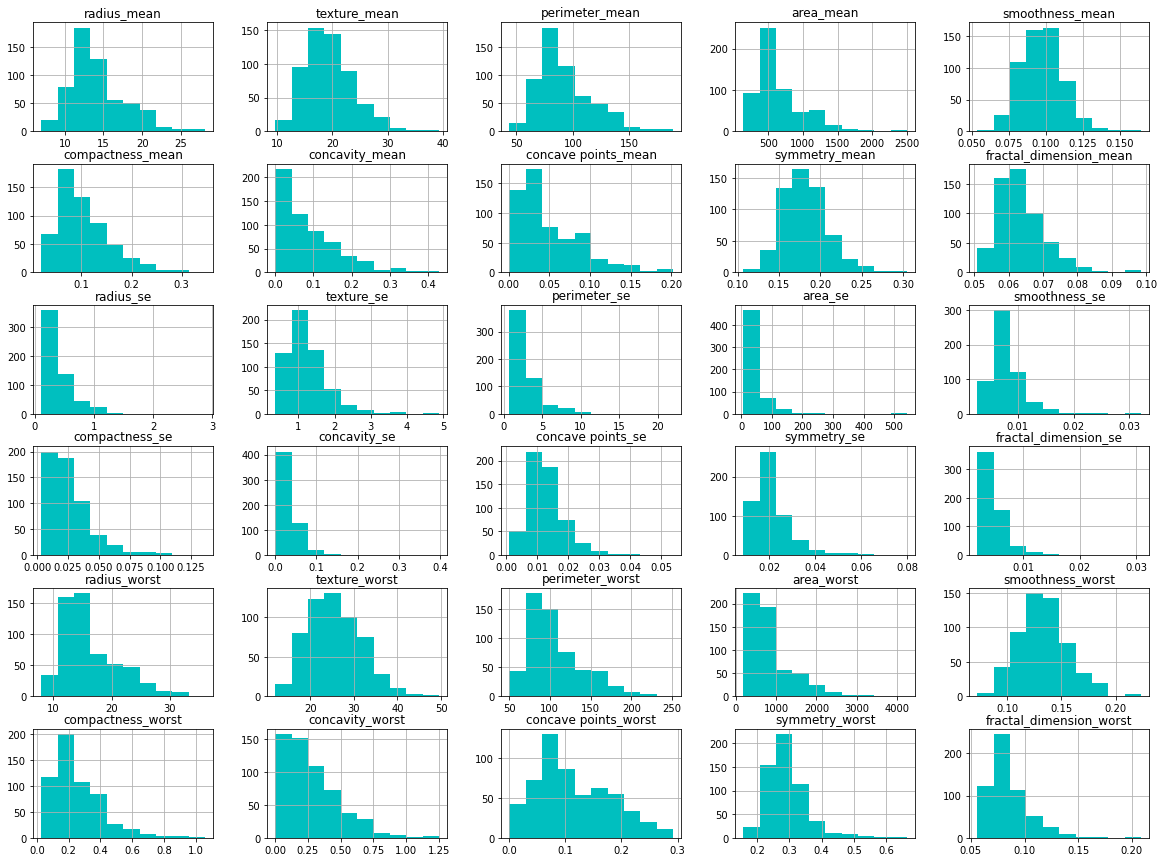

In [ ]:
X = wisconsin_df.drop(['diagnosis'], axis=1)
(X+0.001).hist(figsize=(20, 15), color = 'c');

Almost all distributions are skewed to the right, (i.e. rise very sharply in the beginning for very small values near zero), peaks out early, then decreases sharply and leave the long tail. Each histogram is similar to lognormal distribution, a continuous distribution in which the logarithm of a variable has a normal distribution. For algorithms like linear regressions and KNN, numerical features have to be scaled in order to avoid over fitting and make more accurate predictions. To be scaled numerical features must follow normal distribution.

A log transformation is often used to transform skewed data to approximately normal and thus, to augment the reliability of the linear regression analyses. I will apply log function to make the features normally distributed.

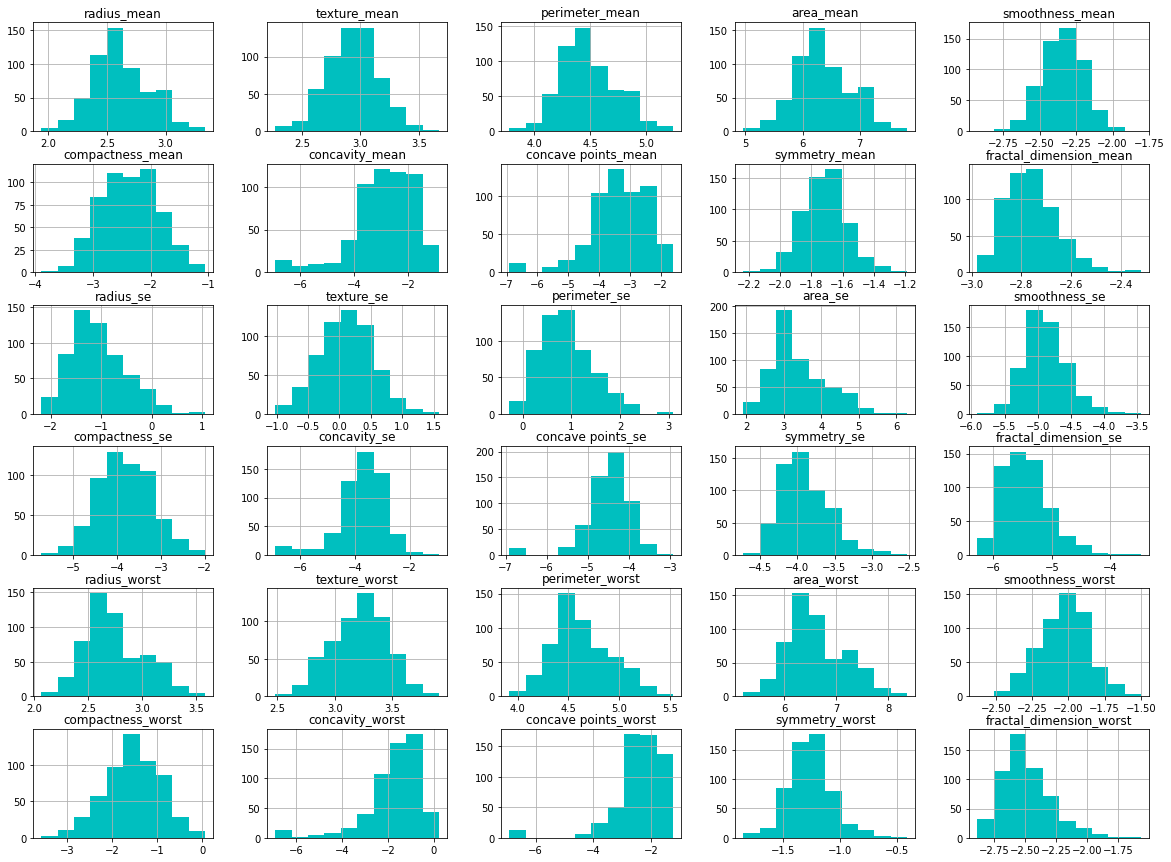

In [ ]:
#Log transformation
X = wisconsin_df.drop(['diagnosis'], axis=1)
X_log = np.log(X+0.001)
X_log.hist(figsize=(20, 15), color = 'c');

Overall, almost all features have bell-shaped distributions despite concave points features, which could be affected by malignant instances where the number of contour concavities increases dramatically. I will use the log-transformation in Logistic regression and KNN algorithms before scaling the data. Then numerical features will be scaled with StandardScaler() function in Python, such that the distribution has a mean value of 0 and a standard deviation of 1.

Before applying ML algorithms, I will first split the data into training and testing sets. 

In [ ]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#Classification

I will now fit five different supervised learning models (KNN, Logistic Regression, Linear Support Vector Machine, Decision Tree, and Random Forest). 

*KNN (K Nearest Neighbors)* is a non-linear classifier and it looks for similarities between data points. This algorithm compares each observation (or data point) to its closest (nearest) k neighbors. k is the number of neighbors set, which is determined by the data scientist. A KNN trained with k = 3 neighbors will compare an unknown observation to the 3 observations closest to it. The algorithm assigns the datapoint to a specific class based on which class is most common among the k neighbors.

A *Logistic Regression* is a type of linear classifier. This model can be useful when the data is linearly separable. I anticipate this data being linearly separable considering all of the correlations found in the heat map. Training/testing the model and printing a classification report will tell me whether or not a logistic regression is a good fit to the data.

*Decision Trees* are another type of non-linear classifer. This algorithm assigns datapoints to certain classes (in this case malignant or benign) by splitting the data based on a specific differentiator in the data. This process is repeated until each observation is assigned to a class (or 'leaf' in the decision tree). Decision trees examine the observations to determine where to split the data, and they attempt to make efficient decisions at each split, but this algorithm is often subject to overfitting. 

A *Random Forest* is another non-linear classifer. Simply put, a random forest is comprised of many decision trees. One can learn a lot about the data and achieve high accuracy rates with a random forest, but this algorithm is often subject to overfitting. I expect that the random forest will perform even better than the decision tree and significantly better than the linear classifers.

A *Support Vector Machine* is a linear model for classification and regression problems. It can solve linear and non-linear problems and work well for many practical problems. The idea of SVM is simple: The algorithm creates a line or a hyperplane which separates the data into classes.

After applying each of these five models, I will then analyze which model is the best for recommeded use based on their test, train, and accuracy results. 

**KNN**

In [ ]:
#GridsearchCV and cross validation searching for KNN hypterparameter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 11)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5,return_train_score = False,n_jobs = -1)# return_train_score = True,
knn_cv.fit(X_train, y_train)
knn_cv.best_params_

{'n_neighbors': 9}

In [ ]:
import pandas as pd
knn_cv_result = pd.DataFrame(knn_cv.cv_results_)
knn_cv_result.head()

mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
0       0.006784      0.004754  ...        0.015996                8
1       0.002103      0.000115  ...        0.021847                9
2       0.001988      0.000370  ...        0.013758                3
3       0.002148      0.000087  ...        0.015423                6
4       0.002151      0.000055  ...        0.011511                2

[5 rows x 14 columns]

In [ ]:
#k=9 is the best hyperparameter, applied this value in the model
clf = KNeighborsClassifier(n_neighbors=9,n_jobs = -1)
clf.fit(X_train, y_train)
print("Training set score: {:.3f}".format(clf.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(clf.score(X_test, y_test)))
print("Best parameters: {}".format(knn_cv.best_params_))
print("Best cross-validation score: {:.4f}".format(knn_cv.best_score_))

Training set score: 0.977
Test set accuracy: 0.965
Best parameters: {'n_neighbors': 9}
Best cross-validation score: 0.9672


**Logistic Regression**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":[0.001, 0.01, 0.1, 1, 10, 100, 1000], "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression(solver='liblinear')
logreg_cv=GridSearchCV(logreg,grid,cv=5,return_train_score = False ,n_jobs = -1)
logreg_cv.fit(X_train,y_train)
logreg_cv.best_params_

{'C': 100, 'penalty': 'l2'}

In [ ]:
import pandas as pd
logreg_cv_result = pd.DataFrame(logreg_cv.cv_results_)
logreg_cv_result.head()

mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
0       0.001768      0.000363  ...        0.004593               13
1       0.001989      0.000277  ...        0.016806               12
2       0.001539      0.000268  ...        0.004593               13
3       0.001827      0.000310  ...        0.011476               11
4       0.003146      0.000404  ...        0.021612               10

[5 rows x 15 columns]

In [ ]:
#use best parameter C value 
logreg1 = LogisticRegression(C=10, penalty = 'l1',solver='liblinear',random_state=0).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg1.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg1.score(X_test, y_test)))
print("Best parameters: {}".format(logreg_cv.best_params_))
print("Best cross-validation score: {:.4f}".format(logreg_cv.best_score_))

Training set score: 0.991
Test set score: 0.944
Best parameters: {'C': 100, 'penalty': 'l2'}
Best cross-validation score: 0.9812


**Linear Support Vector Machine**

In [ ]:
#select best hyperparameter #slow
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
Cs = [0.1, 1, 10, 100]
param_grid = {'C': Cs}
linearSVC = GridSearchCV(LinearSVC(max_iter=500000), param_grid, cv=5,return_train_score = False,n_jobs = -1)
linearSVC.fit(X_train, y_train)
linearSVC.best_params_

{'C': 10}

In [ ]:
import pandas as pd
linearSVC_result = pd.DataFrame(linearSVC.cv_results_)
linearSVC_result.head()

mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
0       0.002521      0.000279  ...        0.023244                4
1       0.003048      0.000426  ...        0.015624                2
2       0.009307      0.001053  ...        0.021829                1
3       0.047452      0.011077  ...        0.020532                3

[4 rows x 14 columns]

In [ ]:
#use best parameter C value 
svm = LinearSVC(C=10).fit(X_train, y_train)
print("Training set score: {:.3f}".format(svm.score(X_train, y_train)))
print("Test set score: {:.3f}".format(svm.score(X_test, y_test)))
print("Best parameters: {}".format(linearSVC.best_params_))
print("Best cross-validation score: {:.4f}".format(linearSVC.best_score_))

Training set score: 0.991
Test set score: 0.958
Best parameters: {'C': 10}
Best cross-validation score: 0.9812


**Decision Tree**

In [ ]:
#decision tree hyperparameter
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
parameters={'min_samples_split' : range(10,500,20),'max_depth': range(1,20,2)}
clf_tree=DecisionTreeClassifier()
grid_search=GridSearchCV(clf_tree,parameters, cv=10,return_train_score = False,n_jobs = -1)
grid_search.fit(X_train, y_train)
print("The best classifier is: ", grid_search.best_params_)

The best classifier is:  {'max_depth': 5, 'min_samples_split': 10}


In [ ]:
import pandas as pd
grid_search_result = pd.DataFrame(grid_search.cv_results_)
grid_search_result.head()

mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
0       0.002725      0.000530  ...        0.027166              118
1       0.002530      0.000406  ...        0.027166              118
2       0.002395      0.000424  ...        0.027166              118
3       0.002905      0.001261  ...        0.027166              118
4       0.002727      0.000363  ...        0.027166              118

[5 rows x 20 columns]

In [ ]:
#use best parameters values 
clf_tree=DecisionTreeClassifier(max_depth=7,min_samples_split=10).fit(X_train, y_train)
print("Training clf_treeset score: {:.3f}".format(clf_tree.score(X_train, y_train)))
print("Test set score: {:.3f}".format(clf_tree.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))

Training clf_treeset score: 0.988
Test set score: 0.909
Best parameters: {'max_depth': 5, 'min_samples_split': 10}
Best cross-validation score: 0.9320


**Random Forest**

In [ ]:
# random forest hyperparameter
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameters={'min_samples_split' : range(10,500,20),'max_depth': range(1,20,2)}
clf_treeR=RandomForestClassifier()
grid_searchR=GridSearchCV(clf_treeR,parameters, cv=10,return_train_score = False,n_jobs = -1)
grid_searchR.fit(X_train, y_train)
print("The best classifier is: ", grid_searchR.best_params_)

The best classifier is:  {'max_depth': 13, 'min_samples_split': 10}


In [ ]:
import pandas as pd
grid_searchR_result = pd.DataFrame(grid_searchR.cv_results_)
grid_searchR_result.head()

mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
0       0.212728      0.002711  ...        0.043220               91
1       0.212592      0.003304  ...        0.042642               75
2       0.212782      0.004184  ...        0.037569              109
3       0.215981      0.009642  ...        0.040300               96
4       0.213217      0.000694  ...        0.031626              116

[5 rows x 20 columns]

In [ ]:
#use best parameters values 
clf_treeR=RandomForestClassifier(max_depth=7,min_samples_split=10).fit(X_train, y_train)
print("Training clf_treeset score: {:.3f}".format(clf_treeR.score(X_train, y_train)))
print("Test set score: {:.3f}".format(clf_treeR.score(X_test, y_test)))
print("Best parameters: {}".format(grid_searchR.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_searchR.best_score_))

Training clf_treeset score: 0.991
Test set score: 0.965
Best parameters: {'max_depth': 13, 'min_samples_split': 10}
Best cross-validation score: 0.9532


The Linear SVM and Logistic Regression models appear to be the best options. Let's do a final test and check for the roc_auc_score.

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score

y_pred = grid_searchR.predict(X_test)
print('accuracy_score: ', accuracy_score(y_test, y_pred))
print('roc_auc_score: ', roc_auc_score(y_test, grid_searchR.predict_proba(X_test)[:,1]))

accuracy_score:  0.965034965034965
roc_auc_score:  0.9972746331236897


The results for each of the models applied were:

Knn: 
*   train 0.977
*   test 0.965
*   Best cross-validation score 0.9672

Logistic Regression: 
*   train 0.991
*   test 0.944
*   Best cross-validation score 0.9812

Linear Support Vector Machine:
*   train 0.991
*   test 0.958
*   Best cross-validation score: 0.9812

Decision Tree: 
*   train 0.988
*   test 0.909
*   Best cross-validation score: 0.9320

Random Forest:
*   train 0.991
*   test 0.965
*   Best cross-validation score: 0.9532

My goal in running each of these models was to reach an accuracy score of at least 70%, which each model achieved. SVM and Logistic Regression models had the highest best cross-validation scores of 0.9812. Both models also had matching training scores of 0.991, however, SMV had a higher test score at 0.958 compared to Logistic Regression's test score of 0.944. Therefore, while both models will work very well, I recommend Linear Support Vector Machine as the best option to use for predicting diagnoses for patients.

# **Unsupervised Learning Models**

Unsupervised techniques can be used when the target variable is unknown. These techniques can also be useful even when the target variable is known, as the clusters created can contain meaningful information about the data. I want to cluster the data to determine if I can analyze the clusters to learn something interesting about the patterns os diagnoses in patients. To draw interesting information from the clusters, I am going to create a few binary variables to later explore the breakdown of those variables across the clusters. I'll start by using PCA and UMAP for visualization purposes.

**PCA for visualization**

It can sometimes be useful to apply PCA and use two components to visualize any clustering in the data. I'll apply PCA to the explanatory features and use 2 components in order to visualize the data in 2D.

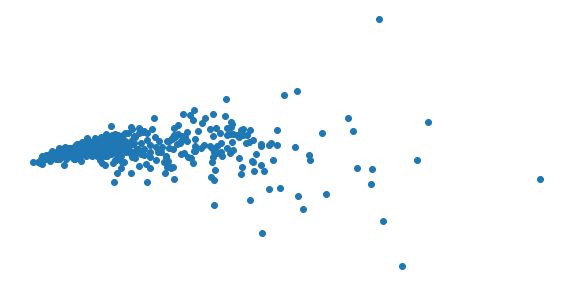

In [ ]:
#define X and y 
X = wisconsin_df[[ 'radius_mean' ,	'texture_mean' ,	'perimeter_mean' ,	'area_mean' ,	'smoothness_mean' ,	'compactness_mean' ,	'concavity_mean' , 'concave points_mean' ,	'symmetry_mean' ,	'fractal_dimension_mean' ,	'radius_se' ,	'texture_se' ,	'perimeter_se' ,	'area_se' ,	'smoothness_se' ,	'compactness_se' ,	'concavity_se' ,	'concave points_se' ,	'symmetry_se' ,	'fractal_dimension_se' ,	'radius_worst' ,	'texture_worst' ,	'perimeter_worst' ,	'area_worst' ,	'smoothness_worst' ,	'compactness_worst' ,	'concavity_worst' ,	'concave points_worst' ,	'symmetry_worst' ,	'fractal_dimension_worst']]
Y = wisconsin_df['diagnosis']

# Use 2 components for two dimensions
pca = PCA(n_components=2)

pca_components = pca.fit_transform(X)
#plot PCA solution
plt.figure(figsize=(10,5))
plt.scatter(pca_components[:, 0], pca_components[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

The PCA solution is clearly not helpful in terms of visualizing any clustering in the data. It is not clear at all from the PCA plot as to whether or not the data clusters in meaningful ways. Hopefully UMAP will prove to be more meaningful.

**UMAP for Visualization**

UMAP, or Uniform Manifold Approximation and Projection, can be used to represent data in lower dimensions. It is difficult to visualize data in 3, 4, 5, etc. dimensions. UMAP, as with PCA, is a dimension reduction technique. It can be useful to apply UMAP and plot the results when using unsupervised learning to determine how many (if any) clusters there are in the data. I'll tune the parameters a bit to determine if UMAP can be useful here.

In [ ]:
import umap
umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X)

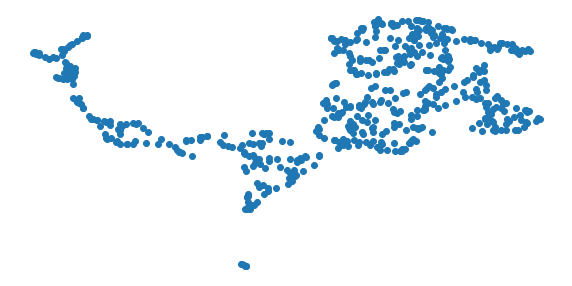

In [ ]:
#plot umap results
plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [ ]:
umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=.001,
                      metric='correlation').fit_transform(X)

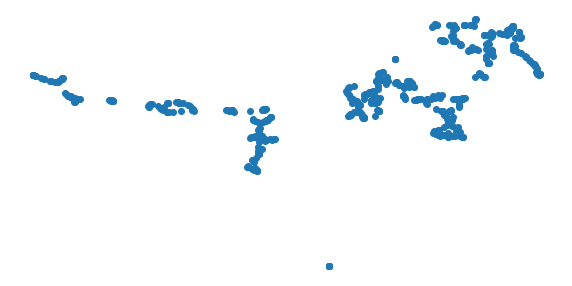

In [ ]:
#plot umap results
plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

It is not clear from either the PCA or UMAP representations as to how many clusters we need. Therefore, I'll vary the k clusters with K Means and examine their silhouette scores. The silhouette scores are one way to measure similarity; a higher silhouette score (closer to 1) indicates that the datapoints within a cluster are closer to each other than they are to datapoints in other clusters.

**K Means**

K Means is probably the most popular unsupervised clustering technique. This algorithm groups the data points into clusters based on the nearest mean of each cluster. The number of k clusters must be set initially, so there is some trial and error involved in choosing k. K means does have a few assumptions--that the clusters have equal variance and are radially symmetric. If the clusters are truly not isotropic, this might not be the best algorithm. I'll standardize X and fit various k-means models with different k clusters.

In [ ]:
X = wisconsin_df[[ 'radius_mean' ,	'texture_mean' ,	'perimeter_mean' ,	'area_mean' ,	'smoothness_mean' ,	'compactness_mean' ,	'concavity_mean' , 'concave points_mean' ,	'symmetry_mean' ,	'fractal_dimension_mean' ,	'radius_se' ,	'texture_se' ,	'perimeter_se' ,	'area_se' ,	'smoothness_se' ,	'compactness_se' ,	'concavity_se' ,	'concave points_se' ,	'symmetry_se' ,	'fractal_dimension_se' ,	'radius_worst' ,	'texture_worst' ,	'perimeter_worst' ,	'area_worst' ,	'smoothness_worst' ,	'compactness_worst' ,	'concavity_worst' ,	'concave points_worst' ,	'symmetry_worst' ,	'fractal_dimension_worst']]
# K mean is sensitive to the scale of data, so we standarize:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#fit k means and get predictions (3-5 cluster solutions)

pred_3 = KMeans(n_clusters=3, random_state=123).fit_predict(X_std)
pred_4 = KMeans(n_clusters=4, random_state=123).fit_predict(X_std)
pred_5 = KMeans(n_clusters=5, random_state=123).fit_predict(X_std)

#get silhouette scores for each

print("Silhouette score for three cluster k-means: {}".format(
   metrics.silhouette_score(X_std, pred_3, metric='euclidean')))
print("Silhouette score for four cluster k-means: {}".format(
   metrics.silhouette_score(X_std, pred_4, metric='euclidean')))
print("Silhouette score for five cluster k-means: {}".format(
   metrics.silhouette_score(X_std, pred_5, metric= 'euclidean')))

Silhouette score for three cluster k-means: 0.3143840098608098
Silhouette score for four cluster k-means: 0.2726156083675339
Silhouette score for five cluster k-means: 0.17574947495510682


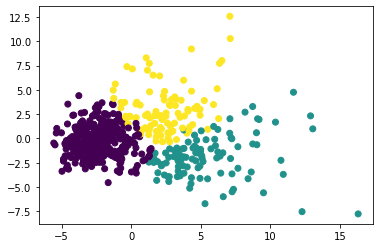

In [ ]:
#visualize the k-means 3 cluster solution using 2 PCA components

X_pca = PCA(2).fit_transform(X_std)

# Plot the solution
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=pred_3)
plt.show()

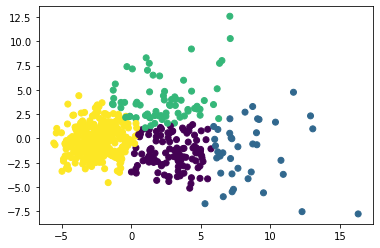

In [ ]:
# Plot the 4 cluster solution
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=pred_4)
plt.show()

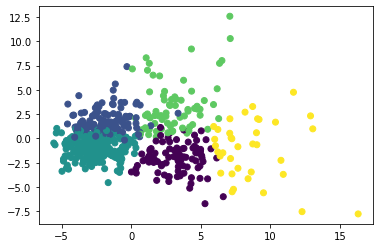

In [ ]:
# Plot the 5 cluster solution
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=pred_5)
plt.show()

The various k-means silhoutte scores are decent, but let's use DBSCAN as well to see if we can improve those silhouette scores.

**Density-based Spatial Clustering of Applications with Noise (DBSCAN)**

DBSCAN is a clustering method that is useful for identifying clusters of any shape, unlike K-Means that assumes the clusters to be isotropic. This algorithm divides the datapoints into clusters of highly-dense areas, dense refering to the concentration/closeness of the observations in each cluster. While DBSCAN is useful for identifying non-circular shapes, this algorithm does not perform as well in regard to identifying clusters that are not separated well. We can tune epsilon (the radius to search for nearby observations) and minPts (the minimum number of points necessary to create a cluster) when fitting DBSCAN clustering algorithms. Typically, the number of clusters will decrease as epsilon and minPts decrease.

In [ ]:
dbscan_cluster = DBSCAN(eps=1.5, min_samples=5)

# Fit model
clusters = dbscan_cluster.fit_predict(X_std)
print("The silhouette score of the DBSCAN solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

The silhouette score of the DBSCAN solution: -0.2195882795673518


Unfortunately, I faced computational limitations and was unable to run DBSCAN with the epsilon parameter set any higher than 1.5. It would be interesting in the future to run DBSCAN with a larger radius to see if the silhouette score could be improved.

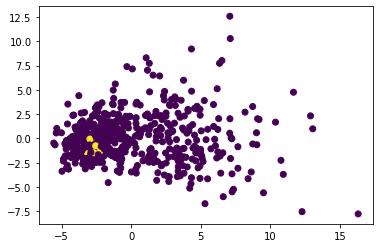

In [ ]:
# Plot the solution
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters)
plt.show()

**Exploring the Clusters**

The silhouette scores are somewhat low, so it might be difficult to learn about this data from clusters. I'll assign labels to the datapoints to further explore the clusters to try and pull meaningful information from them. Since there are only small differences between the silhouette scores for the various k-means clustering solutions, I will look more closely at the K-Means 5 cluster solution to learn more about the data and clusters. I'll also explore the DBSCAN solution.

**K Means**

In [ ]:
#K means with 5 clusters
X_std = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [ ]:
#add kmeans predictions to X
X['kmeans_diagnosis'] = kmeans.labels_

Text(0.5, 1.0, 'K-Means Clustering of Patient Diagnosis')

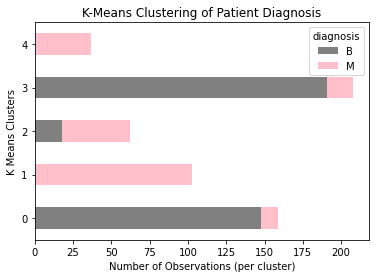

In [ ]:
#plot 'diagnosis' per cluster 
pd.crosstab(X['kmeans_diagnosis'],wisconsin_df['diagnosis']).plot.barh(stacked=True, color =['grey', 'pink'])
plt.ylabel('K Means Clusters')
plt.xlabel('Number of Observations (per cluster)')
plt.title('K-Means Clustering of Patient Diagnosis')

From the above bar plot, we can tell that clusters 1 and 4 contain the most instances of malignant disagnoses, with cluser 2 containing higher instances of malignant diagnoes, while clusters 0 and 3 contain almost entirely benign diagnoses. This K-Means solution clearly illustrates how the patients are disgnosed by cluster.

# **Deep Learning (Neural Networks)**

Deep learning is powerful and made possible with big data and improved computational resources. Neural networks in particular require stacking layer upon layer when building models. Neural networks consist of an input layer, hidden layer(s), and an outer layer, with each layer having a set number of neurons. The output of one layer becomes the input of the next layer, and so on until the final (outer) layer. The data scientist must decide how many layers and how many neurons per layer when building a neural network.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
import keras
from keras.models import Sequential, Model
from keras.layers import AveragePooling1D, Dense, Dropout, Flatten, MaxPooling2D, MaxPooling1D, BatchNormalization, Activation, Conv1D, Conv2D 
import tensorflow as tf
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
X = wisconsin_df.drop(['diagnosis'], axis=1).values
y =  wisconsin_df['diagnosis']

# Encoding categorical data
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

#Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

*How to decide the number of hidden layers and nodes in a hidden layer?*

*   The number of hidden neurons should be between the size of the input layer and the size of the output layer.
*   The number of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer.
*   The number of hidden neurons should be less than twice the size of the input layer.

**Keras**

In [ ]:
X_train.shape[1]

30

In [ ]:
classifier = Sequential() 
classifier.add(Dense(units = 24, activation = 'relu', input_dim = X_train.shape[1]))
classifier.add(Dropout(0.2))

classifier.add(Dense(units = 12, activation = 'relu'))
classifier.add(Dropout(0.2))

classifier.add(Dense(units = 1, activation = 'sigmoid'))
classifier.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=4)

history = classifier.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=100, batch_size=100, callbacks=[callback] ,verbose=1)

#get scores and print accuracy
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/100
4/4 [==============================] - 0s 26ms/step - loss: 0.8104 - accuracy: 0.4673 - val_loss: 0.7115 - val_accuracy: 0.5029
Epoch 2/100
4/4 [==============================] - 0s 10ms/step - loss: 0.7170 - accuracy: 0.5377 - val_loss: 0.6382 - val_accuracy: 0.6023
Epoch 3/100
4/4 [==============================] - 0s 10ms/step - loss: 0.6392 - accuracy: 0.6231 - val_loss: 0.5796 - val_accuracy: 0.7135
Epoch 4/100
4/4 [==============================] - 0s 9ms/step - loss: 0.6010 - accuracy: 0.6884 - val_loss: 0.5259 - val_accuracy: 0.7895
Epoch 5/100
4/4 [==============================] - 0s 10ms/step - loss: 0.5377 - accuracy: 0.7663 - val_loss: 0.4776 - val_accuracy: 0.8538
Epoch 6/100
4/4 [==============================] - 0s 11ms/step - loss: 0.4846 - accuracy: 0.8216 - val_loss: 0.4339 - val_accuracy: 0.8889
Epoch 7/100
4/4 [==============================] - 0s 10ms/step - loss: 0.4515 - accuracy: 0.8442 - val_loss: 0.3944 - val_accuracy: 0.9123
Epoch 8/100
4/4 [====

In [ ]:
mse_value, mae_value = classifier.evaluate(X_test, y_test, verbose=0)
print("mse_value: ", mse_value)
print("mae_value: ", mae_value)

mse_value:  0.09189411252737045
mae_value:  0.9590643048286438


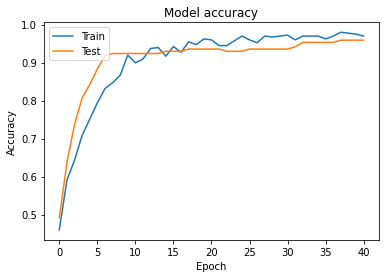

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

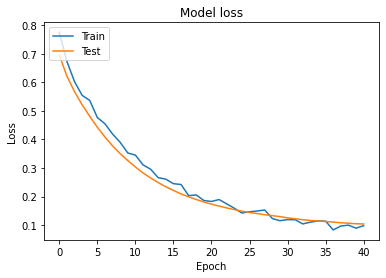

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

**Tensorflow**

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 24, activation = 'relu', input_dim=X_train.shape[1]))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units = 12, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=4)

history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=100, batch_size=100, callbacks=[callback], verbose=1)

#get scores and print accuracy
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/100
4/4 [==============================] - 0s 27ms/step - loss: 0.8024 - accuracy: 0.4497 - val_loss: 0.6928 - val_accuracy: 0.5556
Epoch 2/100
4/4 [==============================] - 0s 11ms/step - loss: 0.6733 - accuracy: 0.5704 - val_loss: 0.6200 - val_accuracy: 0.6784
Epoch 3/100
4/4 [==============================] - 0s 10ms/step - loss: 0.6125 - accuracy: 0.6407 - val_loss: 0.5676 - val_accuracy: 0.7485
Epoch 4/100
4/4 [==============================] - 0s 10ms/step - loss: 0.5550 - accuracy: 0.7161 - val_loss: 0.5215 - val_accuracy: 0.7836
Epoch 5/100
4/4 [==============================] - 0s 10ms/step - loss: 0.5314 - accuracy: 0.7337 - val_loss: 0.4810 - val_accuracy: 0.8246
Epoch 6/100
4/4 [==============================] - 0s 10ms/step - loss: 0.4759 - accuracy: 0.8116 - val_loss: 0.4444 - val_accuracy: 0.8538
Epoch 7/100
4/4 [==============================] - 0s 9ms/step - loss: 0.4518 - accuracy: 0.8141 - val_loss: 0.4167 - val_accuracy: 0.8713
Epoch 8/100
4/4 [====

In [ ]:
mse_value, mae_value = model.evaluate(X_test, y_test, verbose=0)
print("mse_value: ", mse_value)
print("mae_value: ", mae_value)

mse_value:  0.09041338413953781
mae_value:  0.9707602262496948


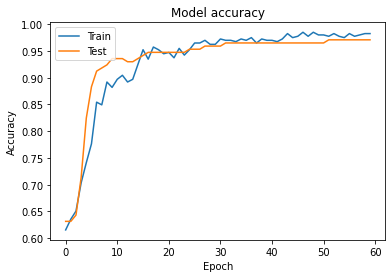

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

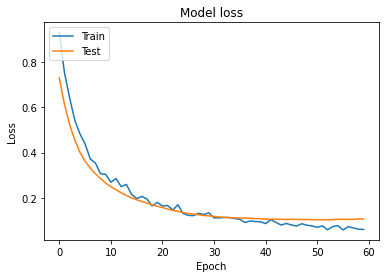

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

Both Keras and Tensorflow had very high accuracy rates (97% for Keras and 96% for tensorflow). Neural networks can be incredibly powerful machine learning algorithms and have proven to be the best fit for this data. This is likely because the data is comprised of images and also because there are sequential relationships between the observations. I would like to point out that while deep learning is best for extremely large datasets, and this dataset is not particularly large because it is a healthcare dataset. I have found in talking with SMEs that healthcare datasets, particularly ones dealing with images, are not extensively large. 

# **Summary and Conclusions**

In this project, I explored the data, applied various supervised learning models, used two different clustering algorithms to pull meaningful information from clusters, and attempted to fit a neural network. There are several meaningful take-aways from this analysis. 

First, it was more useful in terms of prediction accuracy to use SVM or Logistic Regression instead of Random Forest as I had initially predicted. Both of those models had higher accuracies than Random Forest. In fact, three out of the five models used scored higher than Random Forest, with Decision Tree being the only model to score lower. 

Second, the clustering models were slightly insightful for this project. In Particular, PCA and UMAP did not offer much for visualizing clusters, however from the cluster analysis I could see that the K-Means solution clearly illustrated how the patients are diagnosed by cluster (malignant or benign). 

Third, neural network application was very helpful in this case, as ANNs seem to be better fits with data that are images or have sequential relationships between the observations. I found the accuracy for both Keras and Tensorflow to be exceptional, scoring above 95%. I can conclude that this is because the data comes from imaging from breast cancer screenings and the algorithms for neural networks can successfully be applied here. 

Finally, I would recommend to healthcare providers implement Support Vector Machine or Logistic Regression, with both models having accuracy rates of 98%. Choosing only one, I would recommend Linear Support Vector Machine, as SMV had a higher test score at 0.958 compared to Logistic Regression's test score of 0.944. Therefore, while both models will work very well, I recommend Linear Support Vector Machine as the best option to use for predicting diagnoses for patients. The data does appear to be linearly separable and thus healthcare providers should use linear classifiers like SVM and LR to predict a patient’s diagnosis of a tumor being malignant or benign.

Healthcare providers can use this analysis and the SVM or LR models to predict a diagnosis for screening purposes. For instance, knowing that there are strong correlations between the area and perimeter of a mass, healthcare providers could plan a biopsy for patients or a plan of care to ensure that there is a timely response. The data exploration also illustrated that there are strong positive linear relationships between malignancy and radius of nuclear, number of concave points, perimeter and area. In seeing these correlations, healthcare providers can create a screening check list of features to look for in a tumor when diagnosing, as they give insights as to the likelihood that it will be malignant or benign. This information can also be used to share with patients to education purposes so that they can be informed in their plan of care.

Next steps: In the future, I would like to try and predict accuracy for supervised models using a feature prediction like SelectKBest or PCA. While the outcomes for accuracy were high with the supervised models, I think using one of these on the supervised learning models would have allowed for me to zero in on specific features. I would also be curious to see how those selected features align with the features that are most correlated. Additionally, I would run a precision test, as my results were based on accuracy and not precision. I would be curious to see the amount of false positives or false negatives resulting from the models. 


# **Suggestions**

I think there are several items that can be added to this data set to provide more insight into breast cancer detection and diagnoses.

*Gender*: The data set does not specify gender, leading me to believe that all patients sampled were solely female. In the future, I would suggest including males in the data. In my research on the topic I learned that The American Cancer Society “estimates for breast cancer in men in the United States for 2021 that about 2,650 new cases of invasive breast cancer will be diagnosed and about 530 men will die from breast cancer” (ACS, 2018). Breast cancer in male patients is a growing concern and should be addressed in terms of data to provide insights for healthcare providers and patients. 

*Race/Ethnicity*: I also suggest including features about race and ethnicity. Research shows that “overall, Black women are more likely to die of breast cancer. For Asian, Hispanic, and Native-American women, the risk of developing and dying from breast cancer is lower. Ashkenazi Jewish women have a higher risk of breast cancer because of a higher rate of BRCA mutations” (BC, 2020). Including features like this in the dataset would provide incredible insight to how breast cancer forms among different races and ethnic groups. It could also lead to further studies on genetic factors vs. environmental factors.

*Malignant Outcome*: It would be helpful for healthcare providers to disclose the outcome of a malignant diagnosis of a breast cancer patient. Specifically, after predicting if the tumor is benign or malignant, it would be insightful to deduce the type of malignant tumor (whether it is carcinoma, sarcoma, leukemia, etc.). The types of tumors could be cross referenced with the correlation data (area, perimeter, etc.) to find patterns. 

# **Sources**

American Cancer Society. (2018, April 27). Breast cancer in men. https://www.cancer.org/cancer/breast-cancer-in-men.html

Breastcancer.org. (2020, July 25). U.S. breast cancer statistics. https://www.breastcancer.org/symptoms/understand_bc/statistics#:~:text=About%201%20in%208%20U.S.,(in%20situ)%20breast%20cancer